In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df = pd.read_excel('Bank Salaries (1).xlsx' , sheet_name = 'Data' )

In [183]:
df

,Employee,Education,Grade,Years1,Years2,Age,Gender,PC Job,Salary
0,1,3,1,3,1,26,Male,No,32000.0
1,2,1,1,14,1,38,Female,No,39100.0
2,3,1,1,12,0,35,Female,No,33200.0
3,4,2,1,8,7,40,Female,No,30600.0
4,5,3,1,3,0,28,Male,No,29000.0
...,...,...,...,...,...,...,...,...,...
203,204,3,6,34,0,60,Male,No,95000.0
204,205,5,6,36,0,61,Male,No,97000.0
205,206,5,6,32,0,62,Male,No,88000.0
206,207,5,6,35,0,59,Male,No,94000.0


 Education: Indicates Education Level, a categorical variable with categories 1-5<br>
 Grade: A categorical variable indication current job level, 1-6, with 1 being lowest and 6 being
highest<br>
 Years1: Years of experience with the bank<br>
 Years2: Number of years of work experience at another bank, prior to Fifth national<br>
 Age: employee’s current age<br>
 Gender: Categorical variable with values ‘Male’ and ‘Female’<br>
 PCJob: A Yes/No categorical variable indicating if the current job is computer related.<br>
 Salary: Current Annual Salary
<br>
Does the data provide evidence that there is discrimination against females in terms of salary?<br>
Using a Regression model, what insights can you obtain about the gender differences if any?<br>

In [184]:
df.drop('Employee' , axis =1 , inplace = True)

In [185]:
df.columns

Index(['Education', 'Grade', 'Years1', 'Years2', 'Age', 'Gender', 'PC Job',
       'Salary'],
      dtype='object')

In [186]:
df.shape

(208, 8)

In [187]:
df.dtypes

Education      int64
Grade          int64
Years1         int64
Years2         int64
Age            int64
Gender        object
PC Job        object
Salary       float64
dtype: object

In [188]:
df.isna().sum()

Education    0
Grade        0
Years1       0
Years2       0
Age          0
Gender       0
PC Job       0
Salary       0
dtype: int64

In [189]:
df.describe()

,Education,Grade,Years1,Years2,Age,Salary
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,3.158654,2.759615,9.673077,2.375000,40.394231,39921.923077
std,1.467464,1.566529,6.987832,3.135237,10.318988,11256.153922
min,1.000000,1.000000,2.000000,0.000000,22.000000,26700.000000
25%,2.000000,1.000000,5.000000,0.000000,32.000000,33000.000000
50%,3.000000,3.000000,8.000000,1.000000,38.500000,37000.000000
75%,5.000000,4.000000,13.000000,4.000000,47.250000,44000.000000
max,5.000000,6.000000,39.000000,18.000000,65.000000,97000.000000


#### Years1:<br>
The average years of experience in the current job is approximately 9.67 years, with a standard deviation of 6.99. The minimum and maximum values are 2 years and 39 years, respectively

#### Years2: <br>
The average years of experience in the current industry is approximately 2.38 years, with a standard deviation of 3.14. The minimum value is 0 years, indicating some individuals may have just entered the industry.<br>
The 25th percentile (first quartile) is 0 years, meaning that 25% of individuals in the dataset have no prior experience in the industry before their current job. The 50th percentile (median) is 1 year, indicating that 50% of individuals have 1 year or less of experience in the current industry.<br>


#### Age:<br>
The average age of the individuals is approximately 40.39 years, with a standard deviation of 10.32. The youngest individual is 22 years old, while the oldest is 65 years old. The IQR is from 32 years to 47.25 years.



<AxesSubplot:>

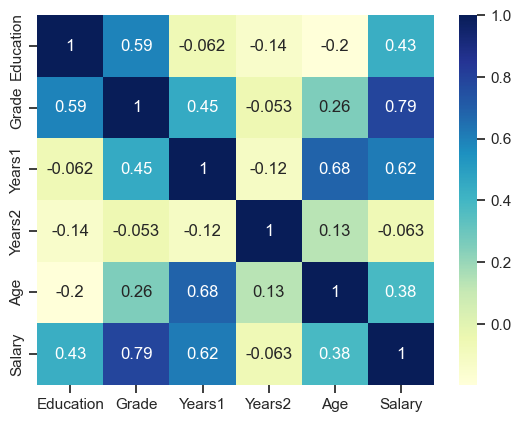

In [190]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [191]:
df_cat = df[['Gender', 'PC Job']]

In [192]:
df_num = df[['Education', 'Grade', 'Years1', 'Years2', 'Age', 'Salary']]

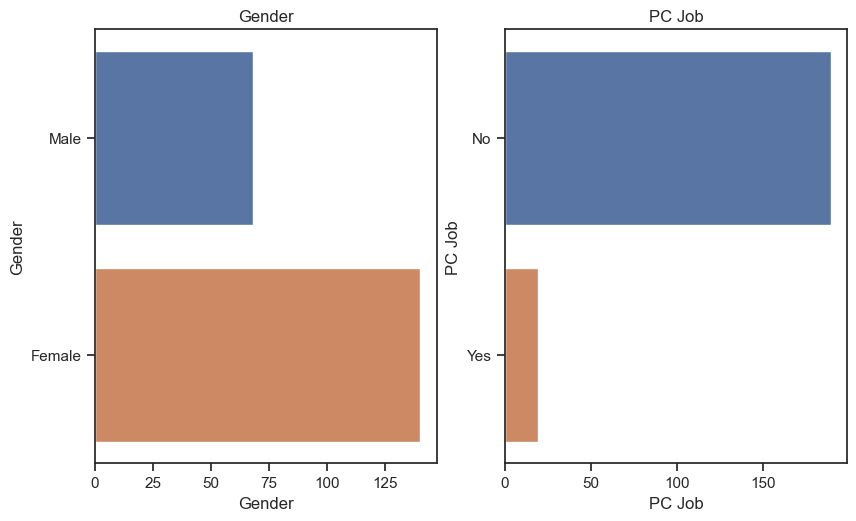

In [193]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in df_cat:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

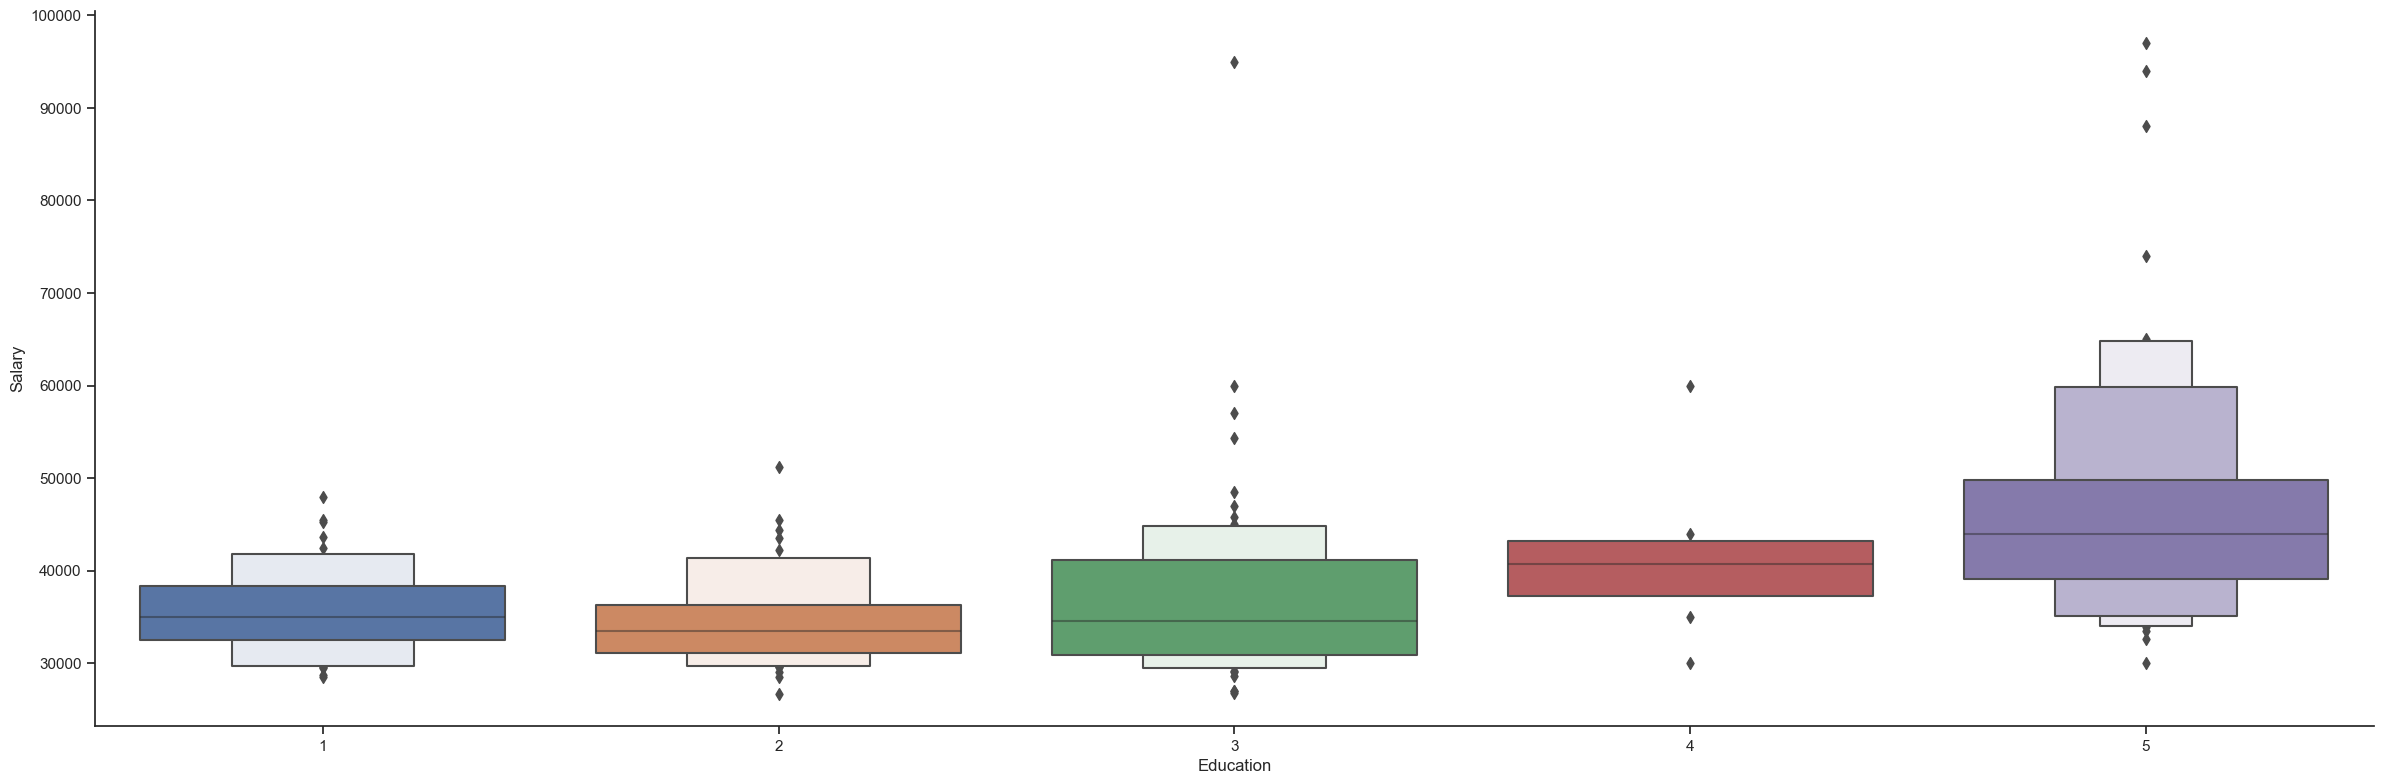

In [194]:
sns.catplot(y = "Salary", x = "Education", data = df.sort_values("Salary", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

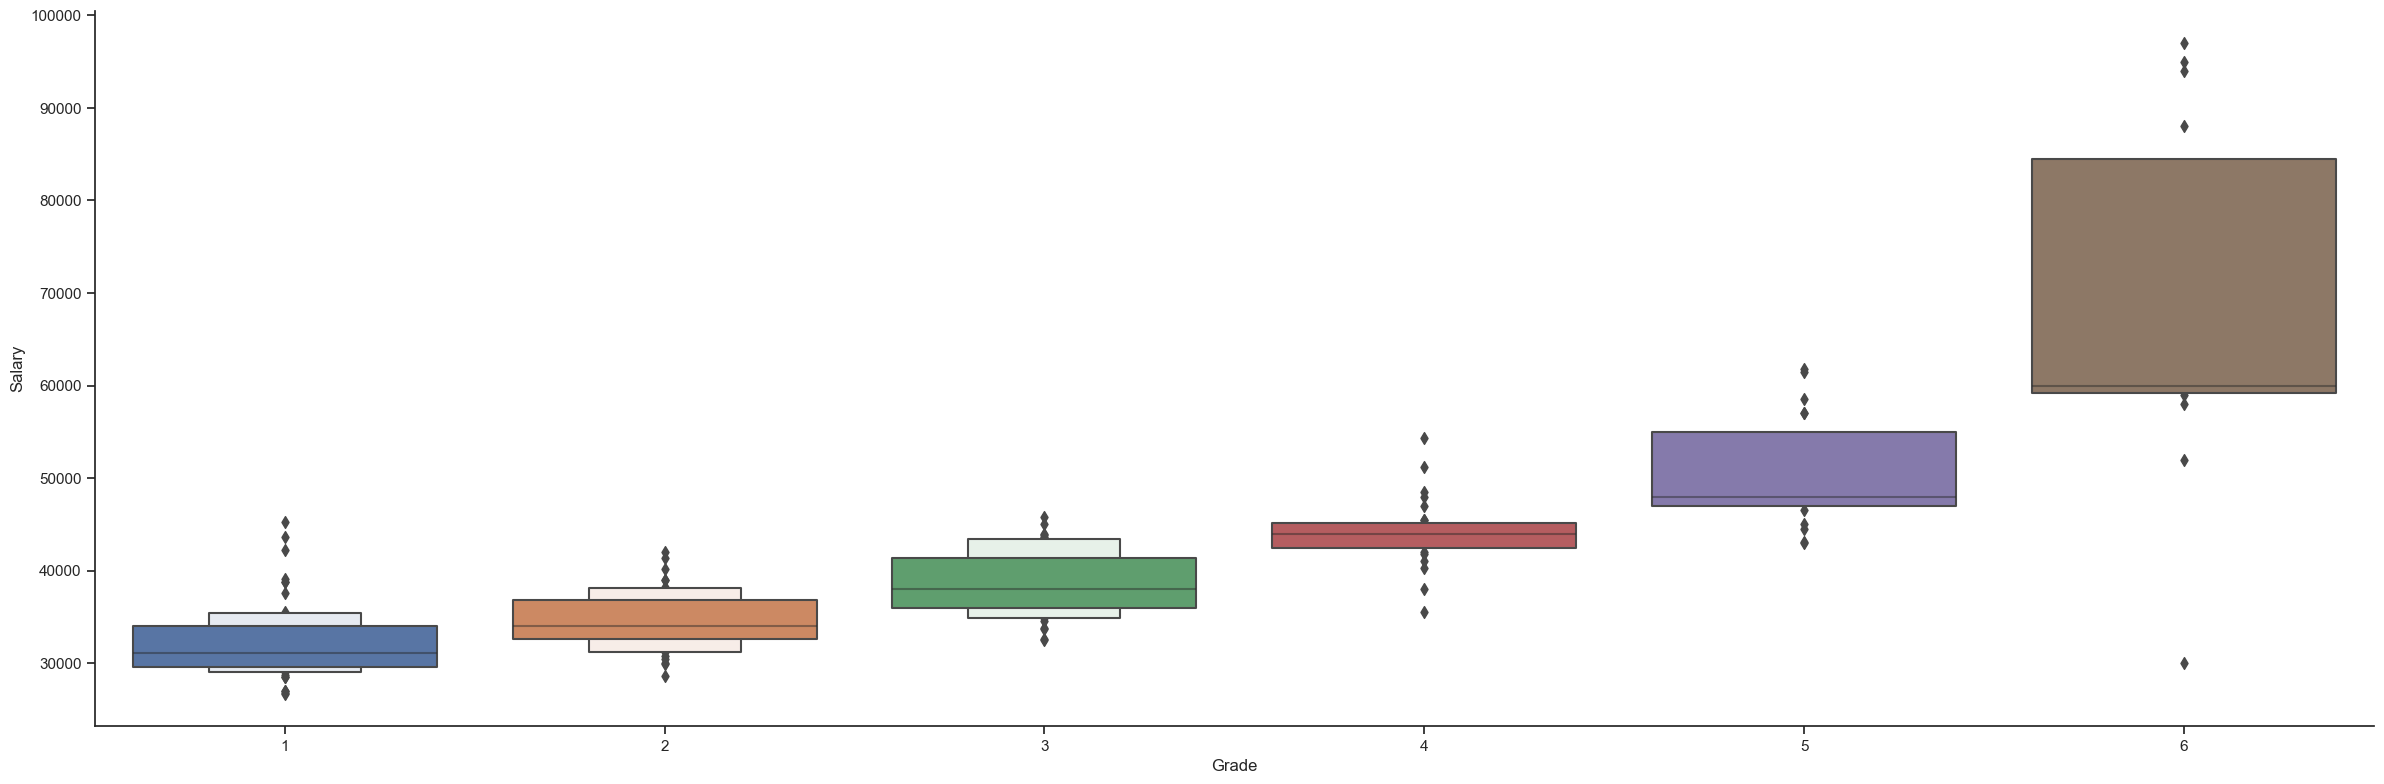

In [195]:
sns.catplot(y = "Salary", x = "Grade", data = df.sort_values("Salary", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

C:\Users\cance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

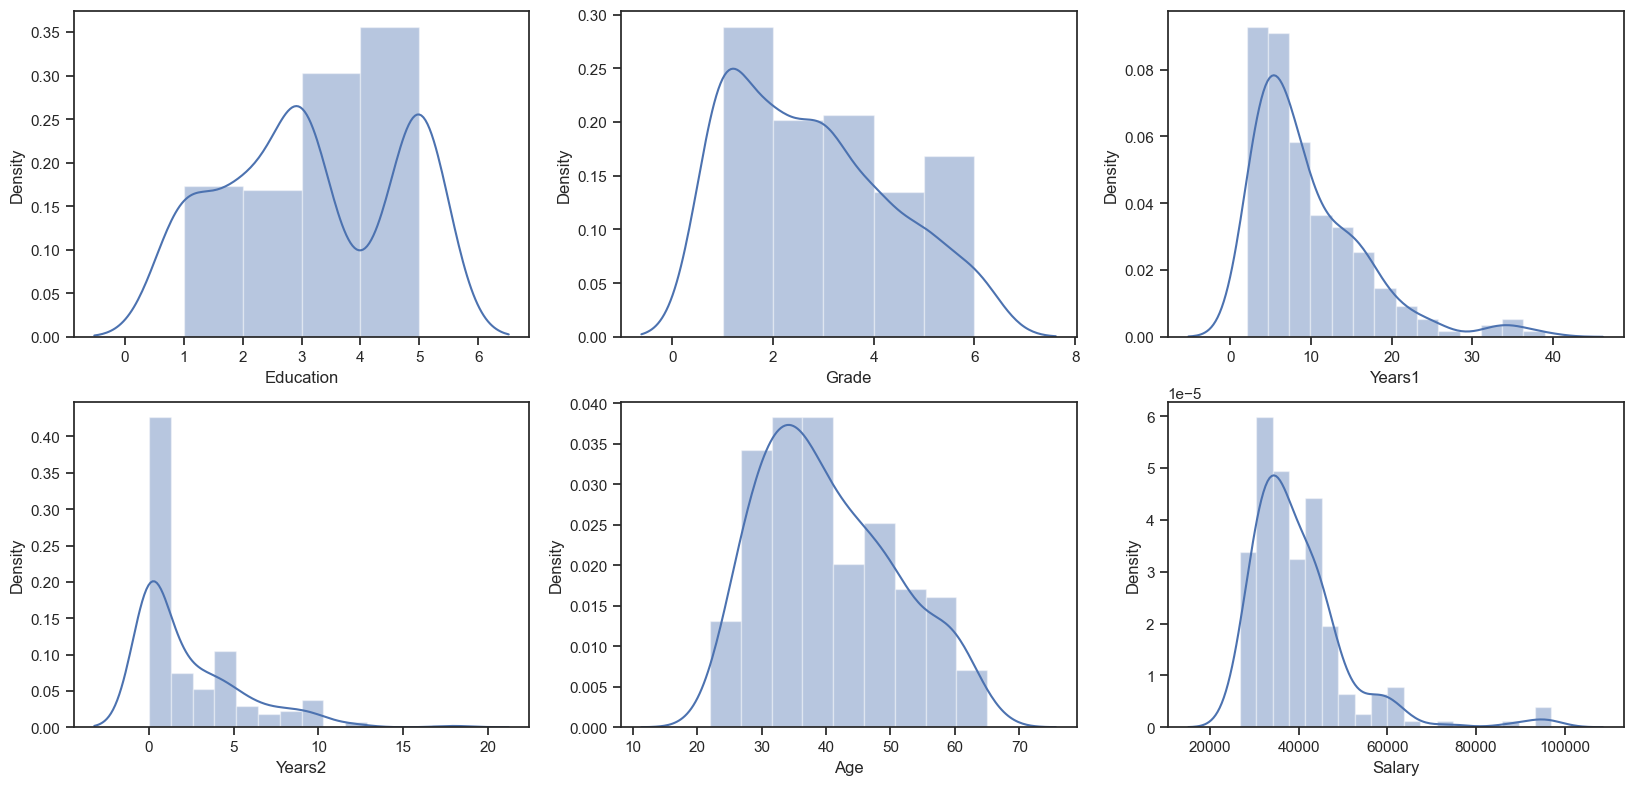

In [196]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in df_num:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

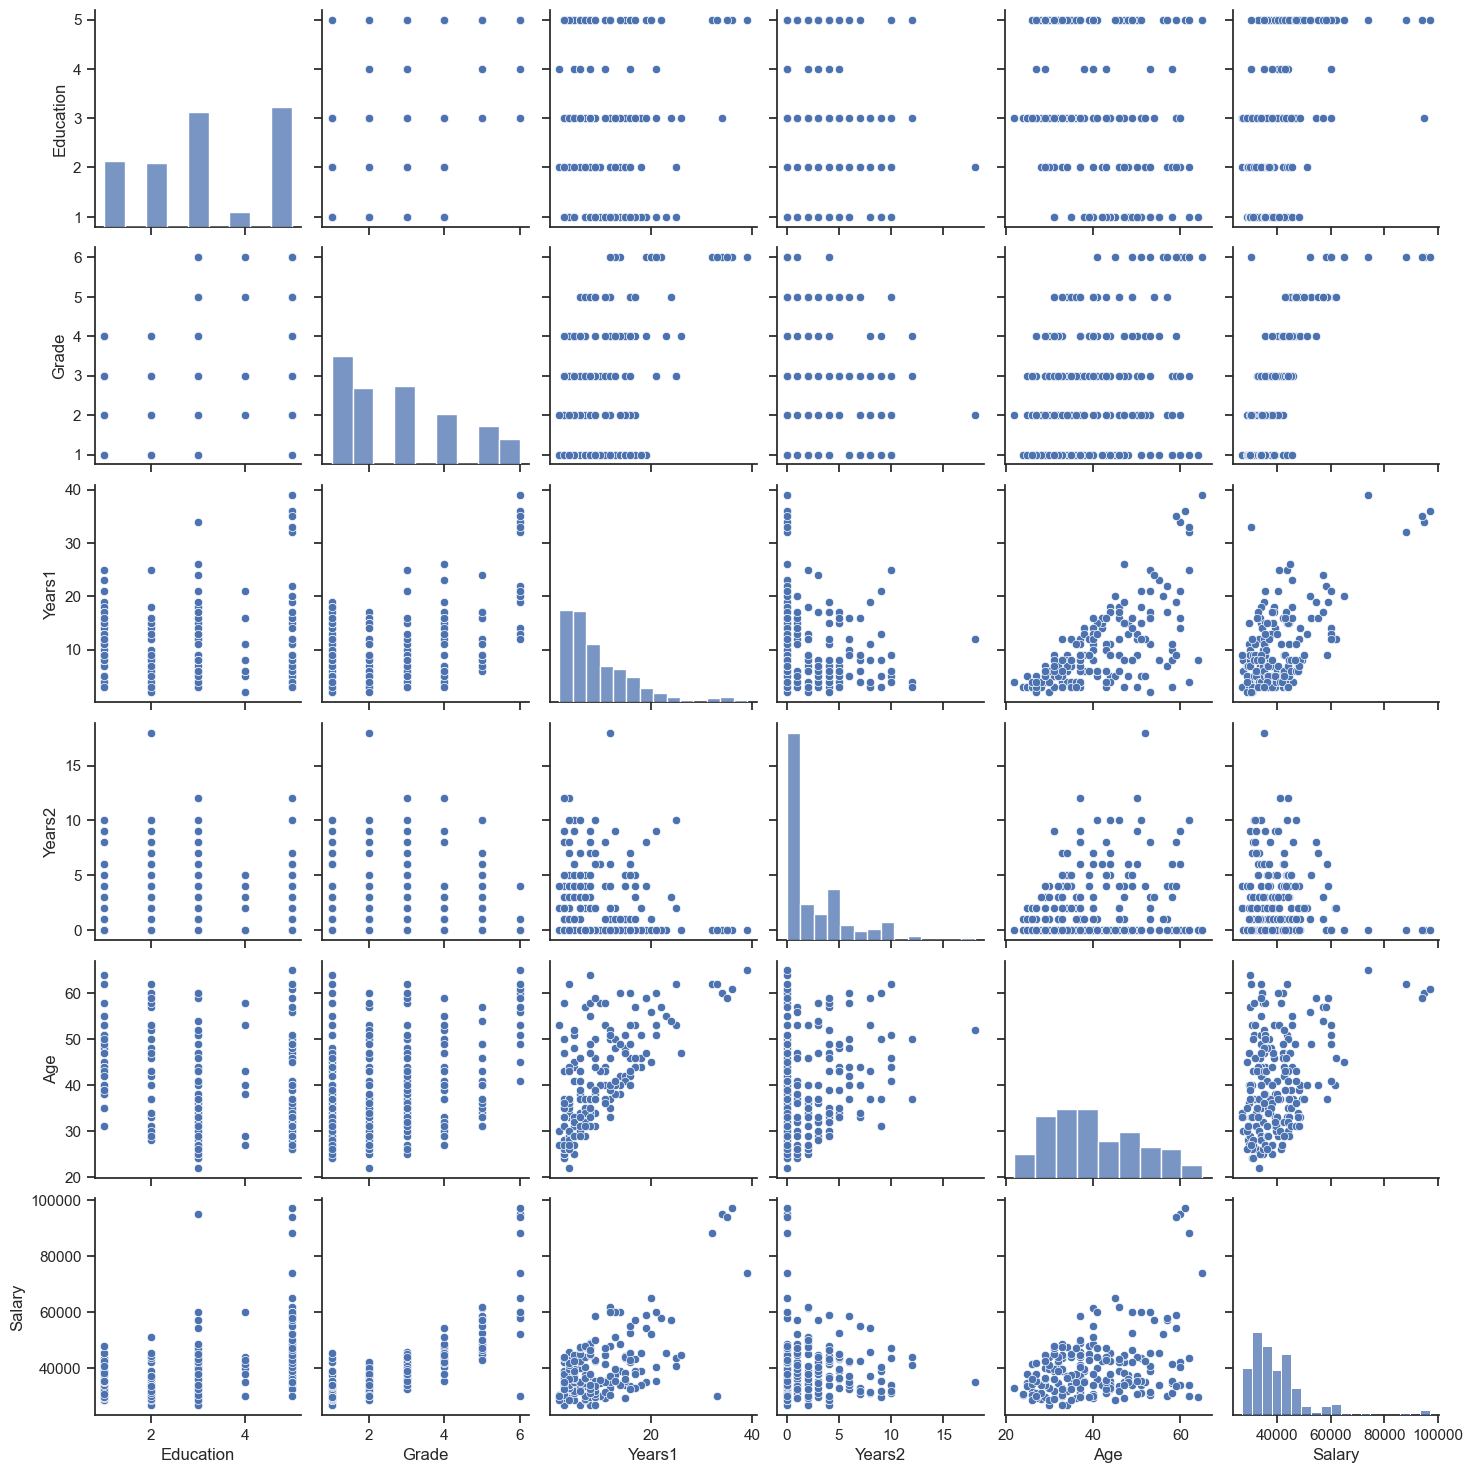

In [197]:
# Create a scatter matrix or pair plot
sns.set(style="ticks")
sns.pairplot(df)

# Display the plot
plt.show()

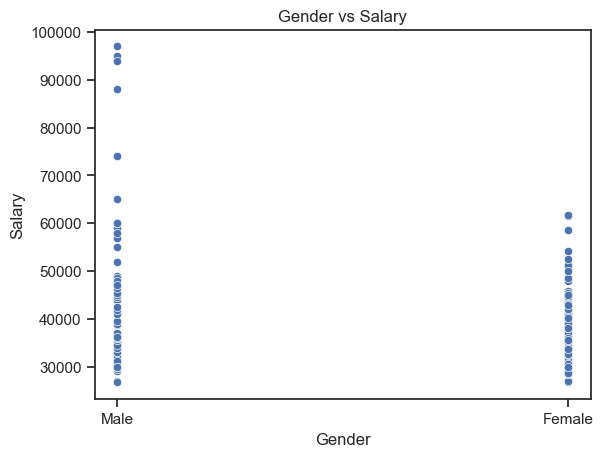

In [198]:
# Create the scatter plot
sns.scatterplot(data=df, x='Gender', y='Salary')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Gender vs Salary')

# Display the plot
plt.show()

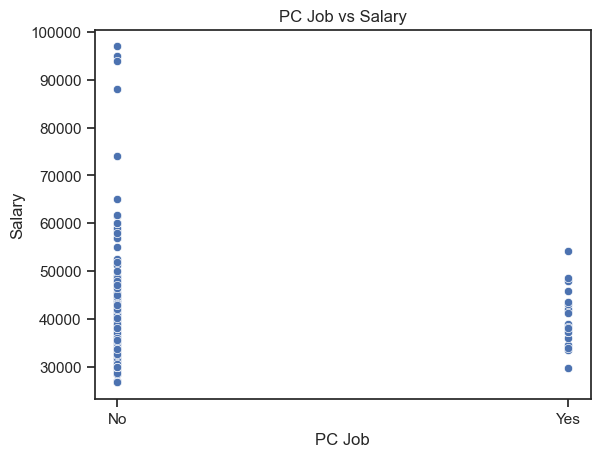

In [199]:
# Create the scatter plot
sns.scatterplot(data=df, x='PC Job', y='Salary')

# Set labels and title
plt.xlabel('PC Job')
plt.ylabel('Salary')
plt.title('PC Job vs Salary')

# Display the plot
plt.show()

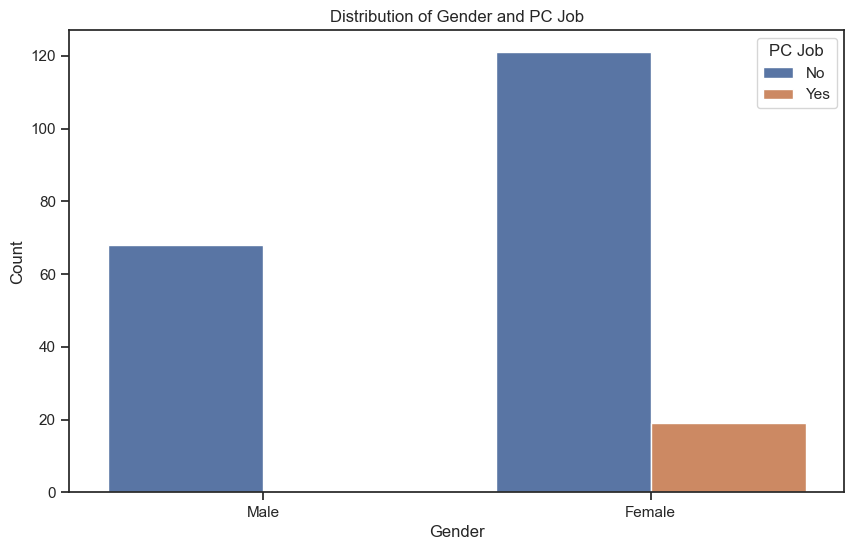

In [200]:
# Plot the count of gender and PC job combinations
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

sns.countplot(data=df, x='Gender', hue='PC Job')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender and PC Job')

# Display the plot
plt.show()

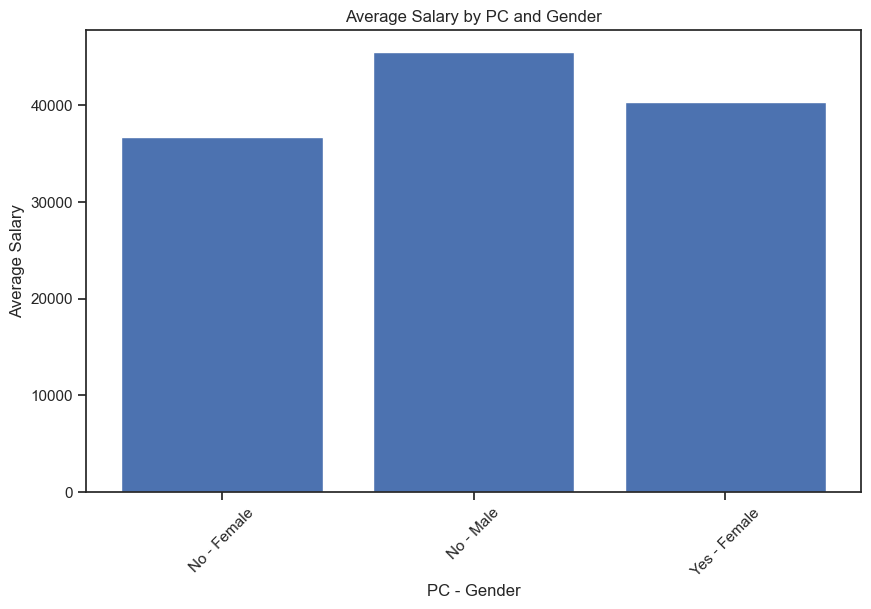

In [201]:

# Group the data by PC and gender, calculate the average salary for each group
grouped_data = df.groupby(['PC Job', 'Gender'])['Salary'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

# Plot the average salary for each PC and gender combination
plt.bar(grouped_data['PC Job'] + ' - '+ grouped_data['Gender'], grouped_data['Salary'])

# Set labels and title
plt.xlabel('PC - Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by PC and Gender')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

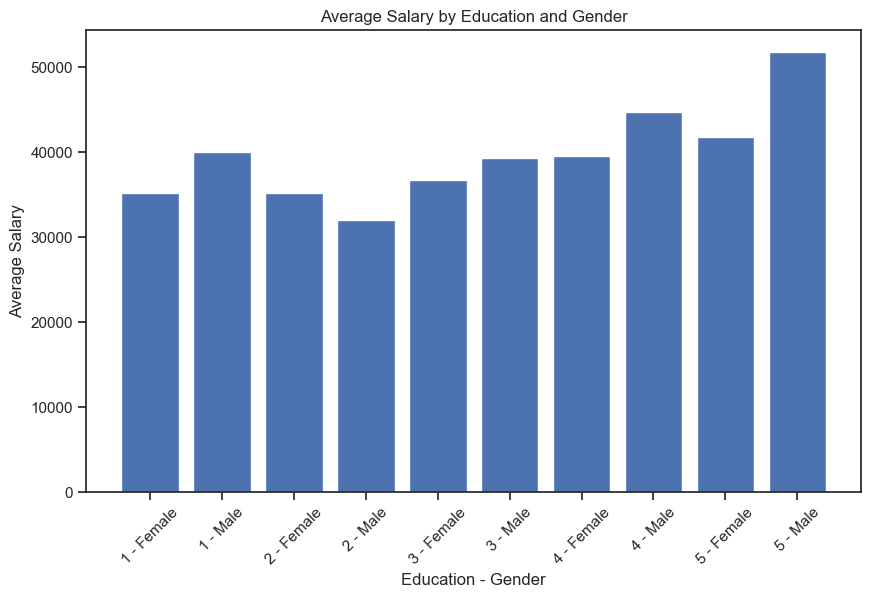

In [202]:
# Convert education column to string
df['Education'] = df['Education'].astype(str)
# Group the data by education and gender, calculate the average salary for each group
grouped_data = df.groupby(['Education', 'Gender'])['Salary'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

# Plot the average salary for each education and gender combination
plt.bar(grouped_data['Education'] + ' - ' + grouped_data['Gender'], grouped_data['Salary'])

# Set labels and title
plt.xlabel('Education - Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education and Gender')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

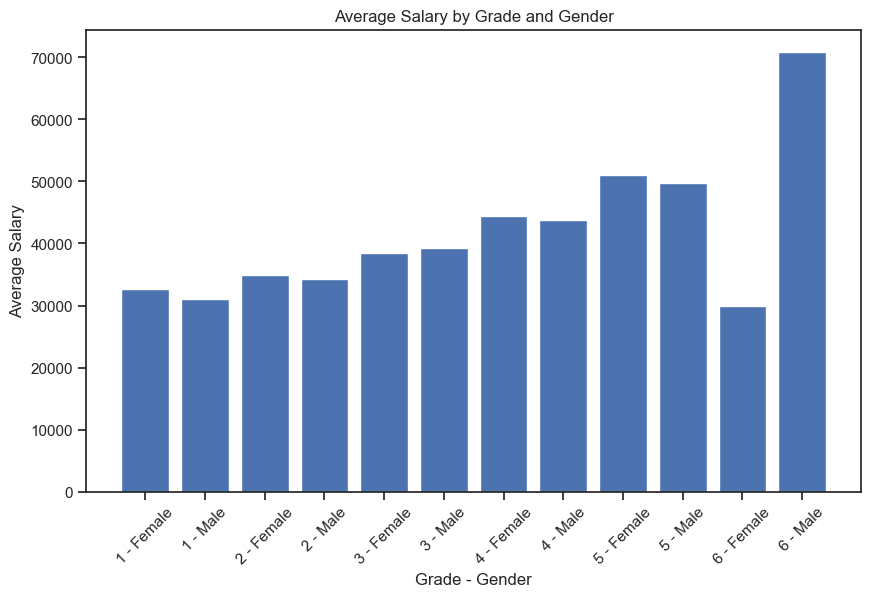

In [203]:
# Convert Grade column to string
df['Grade'] = df['Grade'].astype(str)
# Group the data by Grade and gender, calculate the average salary for each group
grouped_data = df.groupby(['Grade', 'Gender'])['Salary'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

# Plot the average salary for each education and gender combination
plt.bar(grouped_data['Grade'] + ' - ' + grouped_data['Gender'], grouped_data['Salary'])

# Set labels and title
plt.xlabel('Grade - Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by Grade and Gender')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

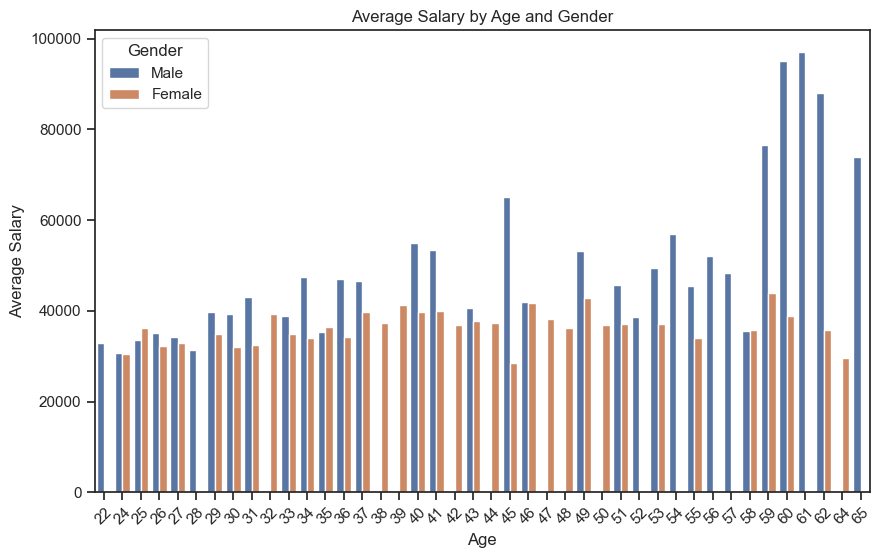

In [204]:
# Group the data by age and gender, calculate the average salary for each group
grouped_data = df.groupby(['Age', 'Gender'])['Salary'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

sns.barplot(data=grouped_data, x='Age', y='Salary', hue='Gender')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Average Salary by Age and Gender')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

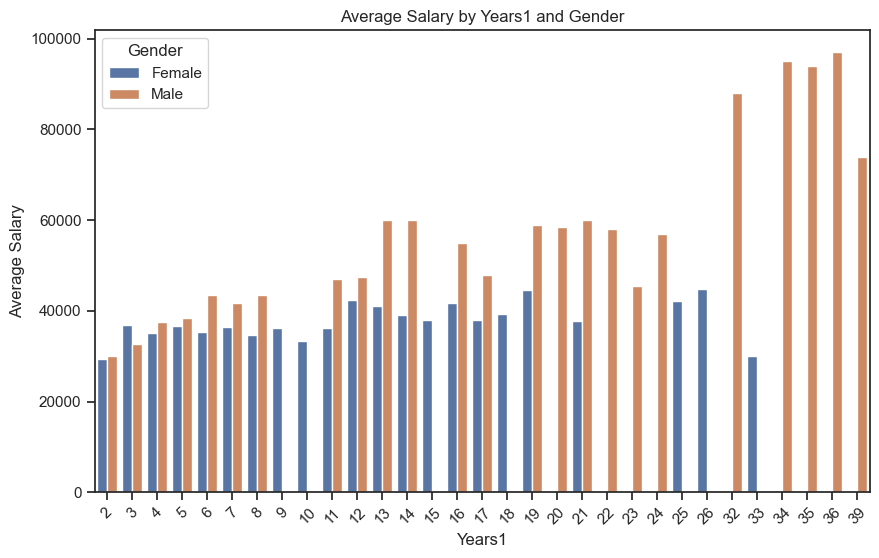

In [205]:
# Group the data by years1 and gender, calculate the average salary for each group
grouped_data = df.groupby(['Years1', 'Gender'])['Salary'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

sns.barplot(data=grouped_data, x='Years1', y='Salary', hue='Gender')

# Set labels and title
plt.xlabel('Years1')
plt.ylabel('Average Salary')
plt.title('Average Salary by Years1 and Gender')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

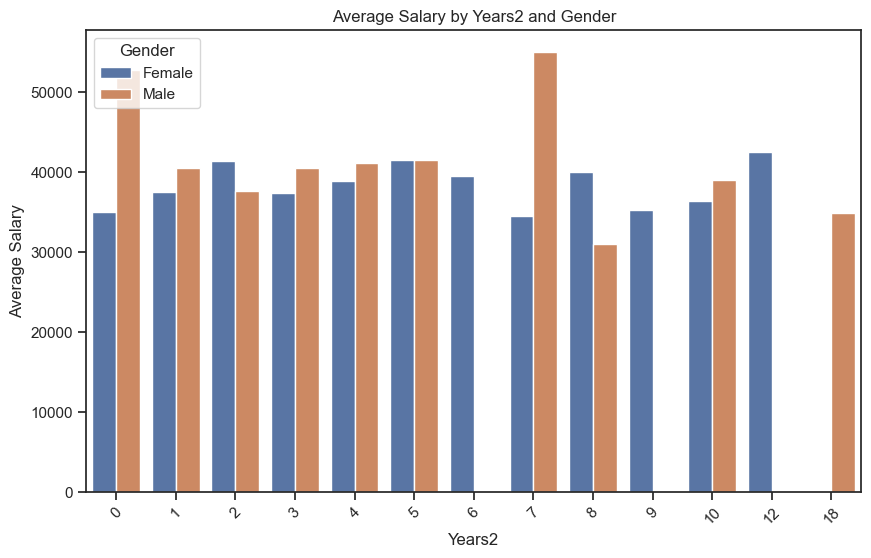

In [206]:
# Group the data by years2 and gender, calculate the average salary for each group
grouped_data = df.groupby(['Years2', 'Gender'])['Salary'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

sns.barplot(data=grouped_data, x='Years2', y='Salary', hue='Gender')

# Set labels and title
plt.xlabel('Years2')
plt.ylabel('Average Salary')
plt.title('Average Salary by Years2 and Gender')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

Null Hypothesis : Salary of Male and Female are equal <br>
Alternate Hypthesis : Significant difference in average salaries between the two gender groups

In [207]:
import scipy.stats as stats

# Assuming you have a DataFrame called 'data' with the mentioned columns

# Split the data into two gender groups
male_salaries = df[df['Gender'] == 'Male']['Salary']
female_salaries = df[df['Gender'] == 'Female']['Salary']

# Perform a two-sample independent t-test
t_statistic, p_value = stats.ttest_ind(male_salaries, female_salaries)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
mean_male = np.mean(male_salaries)
mean_female = np.mean(female_salaries)
# Calculate the mean difference between the two groups
mean_difference = mean_male - mean_female

# Print the result
print("Mean Difference:", mean_difference)

T-Statistic: 5.302363718344887
P-Value: 2.9354470815211685e-07
Mean Difference: 8295.512605042015


As p-value<0.05 means we are rejecting null Hypothesis , their is a significant disparity in salaries by mean difference of 8295.512

#### We will check significance for each column using Hypothesis

#### Education <br>
Null hypothesis (H0): Education has no significant effect on salary.<br>
Alternative hypothesis (Ha): Education has a significant effect on salary.<br>
Grade:
#### Grade<br>
Null hypothesis (H0): Grade has no significant effect on salary.<br>
Alternative hypothesis (Ha): Grade has a significant effect on salary.<br>
#### Years1<br>
Null hypothesis (H0): Years1 has no significant effect on salary.<br>
Alternative hypothesis (Ha): Years1 has a significant effect on salary.<br>
<br>
#### Years2<br>
Null hypothesis (H0): Years2 has no significant effect on salary.<br>
Alternative hypothesis (Ha): Years2 has a significant effect on salary.<br>
#### Age<br>
Null hypothesis (H0): Age has no significant effect on salary.<br>
Alternative hypothesis (Ha): Age has a significant effect on salary.<br>
#### Gender<br>
Null hypothesis (H0): Gender has no significant effect on salary.<br>
Alternative hypothesis (Ha): Gender has a significant effect on salary.<br>
#### PC Job<br>
Null hypothesis (H0): PC Job has no significant effect on salary.<br>
Alternative hypothesis (Ha): PC Job has a significant effect on salary.<br>

In [208]:
df['Salary'].isna().sum()

0

In [209]:
import pandas as pd
import statsmodels.api as sm

# Convert 'Salary' column to numeric data type
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Add a constant column for the intercept in the linear regression model
df['intercept'] = 1

# Perform linear regression and hypothesis testing for each column
columns = ['Education', 'Grade', 'Years1', 'Years2', 'Age']

for column in columns:
    # Convert the column to numeric data type if necessary
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Fit the linear regression model
    model = sm.OLS(df['Salary'], df[[column, 'intercept']])
    results = model.fit()
    
    # Extract the p-value for the independent variable
    p_value = results.pvalues[column]
    
    # Print the results
    print("Column:", column)
    print("P-Value:", p_value)
    print("------------------------")

Column: Education
P-Value: 7.323525644084443e-11
------------------------
Column: Grade
P-Value: 9.357242384343218e-45
------------------------
Column: Years1
P-Value: 4.3852474412292395e-23
------------------------
Column: Years2
P-Value: 0.3685002683206917
------------------------
Column: Age
P-Value: 1.0495307611538795e-08
------------------------


Education: The p-value of 7.32e-11 suggests that Education has a significant effect on salary. We can reject the null hypothesis and conclude that Education is a significant predictor of salary.

Grade: The p-value of 9.36e-45 indicates that Grade has a significant effect on salary. We can reject the null hypothesis and conclude that Grade is a significant predictor of salary.

Years1: The p-value of 4.39e-23 suggests that Years1 has a significant effect on salary. We can reject the null hypothesis and conclude that Years1 is a significant predictor of salary.

Years2: The p-value of 0.37 (> 0.05) indicates that Years2 does not have a significant effect on salary. We fail to reject the null hypothesis and conclude that Years2 is not a significant predictor of salary.

Age: The p-value of 1.05e-08 suggests that Age has a significant effect on salary. We can reject the null hypothesis and conclude that Age is a significant predictor of salary.

In [210]:
df.columns

Index(['Education', 'Grade', 'Years1', 'Years2', 'Age', 'Gender', 'PC Job',
       'Salary', 'intercept'],
      dtype='object')

In [211]:
df['Total_Work_Exp'] = df['Years1'] + df['Years2']

In [212]:
df.head()

,Education,Grade,Years1,Years2,Age,Gender,PC Job,Salary,intercept,Total_Work_Exp
0,3,1,3,1,26,Male,No,32000.0,1,4
1,1,1,14,1,38,Female,No,39100.0,1,15
2,1,1,12,0,35,Female,No,33200.0,1,12
3,2,1,8,7,40,Female,No,30600.0,1,15
4,3,1,3,0,28,Male,No,29000.0,1,3


In [213]:
df.drop(['Years1','Years2','intercept'], axis = 'columns', inplace = True)

In [214]:
df['PC_Job'] = df['PC Job']

In [215]:
df.head()

,Education,Grade,Age,Gender,PC Job,Salary,Total_Work_Exp,PC_Job
0,3,1,26,Male,No,32000.0,4,No
1,1,1,38,Female,No,39100.0,15,No
2,1,1,35,Female,No,33200.0,12,No
3,2,1,40,Female,No,30600.0,15,No
4,3,1,28,Male,No,29000.0,3,No


In [216]:
df.drop('PC Job', axis = 'columns', inplace = True)

In [217]:
df.head()

,Education,Grade,Age,Gender,Salary,Total_Work_Exp,PC_Job
0,3,1,26,Male,32000.0,4,No
1,1,1,38,Female,39100.0,15,No
2,1,1,35,Female,33200.0,12,No
3,2,1,40,Female,30600.0,15,No
4,3,1,28,Male,29000.0,3,No


In [218]:
df.columns

Index(['Education', 'Grade', 'Age', 'Gender', 'Salary', 'Total_Work_Exp',
       'PC_Job'],
      dtype='object')

In [219]:
df.corr()

,Education,Grade,Age,Salary,Total_Work_Exp
Education,1.000000,0.590372,-0.197161,0.431910,-0.118178
Grade,0.590372,1.000000,0.255730,0.785202,0.405744
Age,-0.197161,0.255730,1.000000,0.383798,0.710493
Salary,0.431910,0.785202,0.383798,1.000000,0.561238
Total_Work_Exp,-0.118178,0.405744,0.710493,0.561238,1.000000


In [220]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Salary ~ Education+Grade+Total_Work_Exp+Age+Gender+PC_Job', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,29.570139,Intercept
1,1.269726,Gender[T.Male]
2,1.063572,PC_Job[T.Yes]
3,2.124445,Education
4,2.494648,Grade
5,2.456069,Total_Work_Exp
6,2.094917,Age


In [221]:
X = df.drop('Salary', axis = 'columns')
y = df[['Salary']]

In [222]:
X_cat = X.select_dtypes(exclude = np.number)
X_num = X.select_dtypes(include = np.number)

In [223]:
X_cat.columns

Index(['Gender', 'PC_Job'], dtype='object')

In [224]:
X_num.columns

Index(['Education', 'Grade', 'Age', 'Total_Work_Exp'], dtype='object')

In [225]:
X_cat_encoded = pd.get_dummies(X_cat, columns = ['Gender'])

In [226]:
X_cat_encoded.head()

,PC_Job,Gender_Female,Gender_Male
0,No,0,1
1,No,1,0
2,No,1,0
3,No,1,0
4,No,0,1


In [227]:
X_cat_encoded = pd.get_dummies(X_cat_encoded, columns = ['PC_Job'], drop_first = True)

In [228]:
X_cat_encoded.head()

,Gender_Female,Gender_Male,PC_Job_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [229]:
X =pd.concat([X_cat_encoded,X_num], axis = 'columns')

In [230]:
X.head()

,Gender_Female,Gender_Male,PC_Job_Yes,Education,Grade,Age,Total_Work_Exp
0,0,1,0,3,1,26,4
1,1,0,0,1,1,38,15
2,1,0,0,1,1,35,12
3,1,0,0,2,1,40,15
4,0,1,0,3,1,28,3


In [234]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

In [235]:
lr = LinearRegression()
model_lr = lr.fit(X,y)

In [238]:
preds = model_lr.predict(X)
MAPE = mape(y,preds)
print(MAPE)

0.0908517150692268


In [239]:
ols = sm.OLS(y,X, missing = 'drop')
model_ols = ols.fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     87.03
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.58e-53
Time:                        12:08:55   Log-Likelihood:                -2101.8
No. Observations:                 208   AIC:                             4218.
Df Residuals:                     201   BIC:                             4241.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender_Female   1.675e+04   2270.639      7.377      0.000    1.23e+04    2.12e+04
Gender_Male     2.041e+04   2439.227      8.368      0.000    1.56e+04    2.52e+04
PC_Job_Yes      4086.5679   1494.722      2.734      0.007    1139.220    7033.916
Education        901.3057    415.741      2.168      0.031      81.532    1721.080
Grade           3748.3618    422.021      8.882      0.000    2916.205    4580.518
Age               53.9900     58.710      0.920      0.359     -61.777     169.757
Total_Work_Exp   517.0080     89.679      5.765      0.000     340.175     693.841
==============================================================================
Omnibus:                       64.423   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.458
Skew:                           0.679   Prob(JB):                    6.13e-210
Kurtosis:                      13.456   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""